<a href="https://colab.research.google.com/github/jw00oo1/Dacon/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

data_url = {'train': 'https://bit.ly/34zEKdv',
            'test': 'https://bit.ly/2YGZ0WJ',
            'submission': 'https://bit.ly/3hDT2xi'}

cwd = Path(os.getcwd())

now = datetime.now()

suffix = '2020_9_13__7_20_27'
def set_suffix():
  global suffix
  now = datetime.now()
  year, month, day, hour, minute, second = now.year, now.month, now.day, now.hour, now.minute, now.second
  suffix = f'{year}_{month}_{day}__{hour}_{minute}_{second}'
suffix

'2020_9_13__7_20_27'

In [ ]:
def check_res():
  global cwd
  if not (cwd / 'res').exists():
    os.mkdir(cwd / 'res')
    for key in data_url.keys():
      download_url = data_url[key]
      from urllib.request import urlopen 
      file = urlopen(download_url)
      file_data = file.read()
      with open(cwd / 'res' / f'{key}.csv', 'wb') as f:
        f.write(file_data)
        f.close()

In [ ]:
check_res()

train_path, test_path = [cwd / 'res' / f'{file}.csv' for file in ['train', 'test']]
train_csv = pd.read_csv(train_path)
test_csv = pd.read_csv(test_path)

In [ ]:
train_img = np.array(train_csv[train_csv.keys()[3:]])
train_img = train_img/255.0
train_digit = np.array(train_csv['digit'])

In [ ]:
print(train_img.shape)
print(train_digit.shape)

(2048, 784)
(2048,)


In [ ]:
from sklearn.model_selection import train_test_split

validation_split = 0.2
train_img, val_img, train_digit, val_digit = train_test_split(train_img, train_digit, test_size = validation_split, random_state = 1004)


In [ ]:
print(train_digit.shape)
print(train_img.shape)

(1638,)
(1638, 784)


In [ ]:
"""from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, categories='auto')
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)

train_encoder = encoder.transform(train_digit.reshape(-1,1))
val_encoder = encoder.transform(val_digit.reshape(-1,1))"""

In [ ]:
"""print(train_encoder.shape)
print(val_encoder.shape)"""

In [ ]:
from tensorflow.keras import Model, Input, layers
from tensorflow.keras.layers import BatchNormalization, Conv2D, concatenate, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
"""def CNN():
    img_input = Input(shape=(28, 28, 1))

    c1_1 = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(img_input)
    c1_2 = Conv2D(128, kernel_size=3, strides=1, padding='same')(c1_1)
    add1 = layers.add([c1_1, c1_2])
    c1_3 = layers.Activation('relu')(add1)
    output_1 = c1_3

    c2_1 = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(output_1)
    c2_2 = Conv2D(128, kernel_size=3, strides=1, padding='same')(c2_1)
    add2 = layers.add([c2_1, c2_2])
    c2_3 = layers.Activation('relu')(add2)
    output_2 = MaxPooling2D(pool_size=2)(c2_3)

    c3_1 = Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(output_2)
    c3_2 = Conv2D(256, kernel_size=3, strides=1, padding='same')(c3_1)
    add3 = layers.add([c3_1, c3_2])
    c3_3 = layers.Activation('relu')(add3)
    output_3 = MaxPooling2D(pool_size=2)(c3_3)


    c4_1 = Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu')(output_3)
    c4_2 = Conv2D(512, kernel_size=3, strides=1, padding='same')(c4_1)
    add4 = layers.add([c4_1, c4_2])
    c4_3 = layers.Activation('relu')(add4)
    output_4 = MaxPooling2D(pool_size=2)(c4_3)

    x = Flatten()(output_4)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=[img_input], outputs=[x])
    model.compile(optimizer=Adam(lr=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model"""

In [ ]:
    img_input = Input(shape=(28, 28, 1))

    c0_1 = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(img_input)
    c0_2 = Conv2D(128, kernel_size=3, strides=1, padding='same')(c0_1)
    add0 = layers.add([c0_1, c0_2])
    c0_3 = layers.Activation('relu')(add0)
    output_0 = c0_3

    c1_1 = Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(output_0)
    c1_2 = Conv2D(256, kernel_size=3, strides=1, padding='same')(c1_1)
    add1 = layers.add([c1_1, c1_2])
    c1_3 = layers.Activation('relu')(add1)
    output_1 = MaxPooling2D(pool_size=2)(c1_3)

    c2_1 = Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(output_1)
    c2_2 = Conv2D(256, kernel_size=3, strides=1, padding='same')(c2_1)
    add2 = layers.add([c2_1, c2_2])
    c2_3 = layers.Activation('relu')(add2)
    output_2 = c2_3

    c3_1 = Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu')(output_2)
    c3_2 = Conv2D(512, kernel_size=3, strides=1, padding='same')(c3_1)
    add3 = layers.add([c3_1, c3_2])
    c3_3 = layers.Activation('relu')(add3)
    output_3 = MaxPooling2D(pool_size=2)(c3_3)

    #c4_1 = Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu')(output_3)
    #c4_2 = Conv2D(512, kernel_size=3, strides=1, padding='same')(c4_1)
    #add4 = layers.add([c4_1, c4_2])
    #c4_3 = layers.Activation('relu')(add4)
    #output_4 = MaxPooling2D(pool_size=2)(c4_3)

    x = Flatten()(output_3)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    inter_dense = tf.keras.layers.Dense(512, activation='relu')(x)
    x = Dropout(0.6)(inter_dense)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    model_inter_dense = Model(inputs=[img_input], outputs=[inter_dense])
    model = Model(inputs=[img_input], outputs=[x])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

ValueError: ignored

In [ ]:
model.summary()

Model: "functional_64"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_176 (Conv2D)             (None, 28, 28, 128)  1280        input_21[0][0]                   
__________________________________________________________________________________________________
conv2d_177 (Conv2D)             (None, 28, 28, 128)  147584      conv2d_176[0][0]                 
__________________________________________________________________________________________________
add_88 (Add)                    (None, 28, 28, 128)  0           conv2d_176[0][0]                 
                                                                 conv2d_177[0][0]     

In [ ]:
train_img = train_img.reshape(-1,28,28,1)
val_img =  val_img.reshape(-1,28,28,1)


In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop

epochs = 100
batch_size = 32

reduceLR = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience=10,
)
model_path = cwd / 'CNN' / f'best_model_{suffix}.h5'
mc = ModelCheckpoint(model_path, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30, restore_best_weights = True)

history = model.fit(x = train_img, y = train_digit, epochs = epochs, batch_size = batch_size,
                       shuffle = True, validation_data = (val_img, val_digit), callbacks = [callback,mc, reduceLR])

Epoch 1/100
51/52 [============================>.] - ETA: 0s - loss: 2.3080 - accuracy: 0.1072
Epoch 00001: val_loss improved from inf to 2.28626, saving model to /content/CNN/best_model_2020_9_13__7_20_27.h5
52/52 [==============================] - 2s 41ms/step - loss: 2.3083 - accuracy: 0.1081 - val_loss: 2.2863 - val_accuracy: 0.1049
Epoch 2/100
51/52 [============================>.] - ETA: 0s - loss: 2.2787 - accuracy: 0.1348
Epoch 00002: val_loss improved from 2.28626 to 2.22446, saving model to /content/CNN/best_model_2020_9_13__7_20_27.h5
52/52 [==============================] - 2s 38ms/step - loss: 2.2785 - accuracy: 0.1343 - val_loss: 2.2245 - val_accuracy: 0.1463
Epoch 3/100
51/52 [============================>.] - ETA: 0s - loss: 2.1058 - accuracy: 0.2181
Epoch 00003: val_loss improved from 2.22446 to 1.82383, saving model to /content/CNN/best_model_2020_9_13__7_20_27.h5
52/52 [==============================] - 2s 38ms/step - loss: 2.1053 - accuracy: 0.2179 - val_loss: 1.823

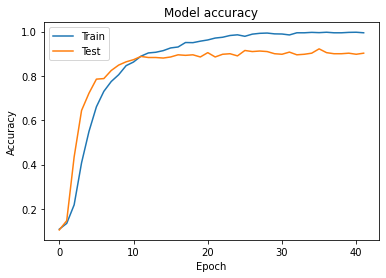

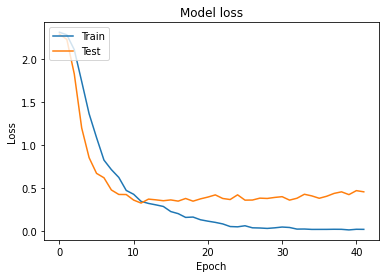

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print(val_img.shape)
print(x_test_xg.shape)

(410, 28, 28, 1)


NameError: ignored

In [ ]:
import xgboost
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC

x_train_xg = model_inter_dense.predict(train_img)
x_test_xg = model_inter_dense.predict(val_img)


train_digit = train_digit.reshape(-1,1)
val_digit = val_digit.reshape(-1,1)

dataset = xgboost.DMatrix(x_train_xg, label=train_digit)
watchlist = [(dataset, 'train')]
params = {'max_depth':7, 'eta':0.1, 'silent':1, 'num_class':10,'objective':'multi:softmax' } 
model_xg = xgboost.train(params, dataset, num_boost_round=150, evals=watchlist)



[0]	train-merror:0.015873
[1]	train-merror:0.007937
[2]	train-merror:0.004884
[3]	train-merror:0.004884
[4]	train-merror:0.004274
[5]	train-merror:0.004274
[6]	train-merror:0.004274
[7]	train-merror:0.003053
[8]	train-merror:0.003053
[9]	train-merror:0.001832
[10]	train-merror:0.001221
[11]	train-merror:0.001221
[12]	train-merror:0.000611
[13]	train-merror:0.000611
[14]	train-merror:0
[15]	train-merror:0
[16]	train-merror:0
[17]	train-merror:0
[18]	train-merror:0
[19]	train-merror:0
[20]	train-merror:0
[21]	train-merror:0
[22]	train-merror:0
[23]	train-merror:0
[24]	train-merror:0
[25]	train-merror:0
[26]	train-merror:0
[27]	train-merror:0
[28]	train-merror:0
[29]	train-merror:0
[30]	train-merror:0
[31]	train-merror:0
[32]	train-merror:0
[33]	train-merror:0
[34]	train-merror:0
[35]	train-merror:0
[36]	train-merror:0
[37]	train-merror:0
[38]	train-merror:0
[39]	train-merror:0
[40]	train-merror:0
[41]	train-merror:0
[42]	train-merror:0
[43]	train-merror:0
[44]	train-merror:0
[45]	train-m

In [ ]:
#setup_data()

test_x = xgboost.DMatrix(x_test_xg)
result = model_xg.predict(test_x)
print(metrics.classification_report(val_digit, result))
print(metrics.confusion_matrix(val_digit, result))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.93      0.98      0.95        42
           2       0.97      0.88      0.93        43
           3       0.83      0.80      0.81        44
           4       0.87      0.85      0.86        46
           5       0.82      0.85      0.84        39
           6       0.93      0.91      0.92        43
           7       0.97      0.92      0.94        36
           8       0.84      0.90      0.87        41
           9       0.81      0.89      0.85        38

    accuracy                           0.89       410
   macro avg       0.89      0.89      0.89       410
weighted avg       0.89      0.89      0.89       410

[[36  0  0  0  1  0  1  0  0  0]
 [ 0 41  0  0  1  0  0  0  0  0]
 [ 1  0 38  2  0  1  1  0  0  0]
 [ 0  0  0 35  1  4  0  1  2  1]
 [ 0  1  1  0 39  0  1  0  1  3]
 [ 0  1  0  1  0 33  0  0  2  2]
 [ 1  1  0  0  1  0 39  0  1  0]
 [ 0  0  0

In [ ]:
import pandas as pd

submission_path = cwd / 'res/submission.csv'
submission_csv = pd.read_csv(submission_path)
submission_csv

In [ ]:
def setup_data():
    global train_ds, test_ds, x_train, y_train, x_test, y_test, x_all, y_all
    train_ds = get_dataset_from_csv(train_csv, to_sparse=False, preprocessing=False)
    test_ds = get_dataset_from_csv(test_csv, True, to_sparse=False, preprocessing=False)

    x_train, y_train = train_ds
    x_test, y_test = test_ds, np.array([-1 for i in range(len(test_ds))])
    x_all = np.append(x_train, x_test, axis=0)
    y_all = np.append(y_train, y_test, axis=0)

In [ ]:
setup_data()

In [ ]:
def get_dataset_from_csv(csv: pd.DataFrame, is_test=False, to_sparse=True, only_img=True, preprocessing=True):
    img_key = csv.keys()[(2 if is_test else 3):]
    letters = []
    letter_temp = csv['letter']
    for letter in letter_temp:
        letter = ord(letter) - ord('A')
        if to_sparse:
            temp = np.zeros(26)
            temp[letter] = 1
        letter = np.array(letter)
        letters.append(letter)
    letters = np.array(letters)
    if len(letters.shape) == 1:
        letters = np.expand_dims(letters, axis=-1)
    imgs = np.array(csv[img_key]).reshape(-1, 28, 28, 1)
    if preprocessing:
        imgs[imgs < 128] = 0
    imgs = imgs / 255.
    ret = imgs if only_img else np.append(letters, imgs, axis=1)
    if not is_test:
        ret = ret, np.array(csv['digit'])
    return ret


In [ ]:
setup_data()

digits = model_xg.predict(test_x)
digits = np.array(digits, dtype=np.uint8)
submission_csv['digit'] = digits

In [ ]:
setup_data()

y_pred = get_prediction(x_train)
y_true = y_train

In [ ]:
suffix = suffix + '_2'
csv_path = cwd
filename = f'submission_final.csv'
path = csv_path / filename

f = open(cwd / 'log.txt', 'a')
# f.write(f'{year}-{month}-{day} {hour}:{minute}:{second} == {cls_report}\n')
# f.close()

submission_csv.to_csv(path, index=False)
submission_csv = pd.read_csv(path)
submission_csv

In [ ]:
|